In [1]:
import pandas as pd
import matplotlib.pylab as plt

In [2]:
# Read csv
hscode_df = pd.read_csv("./data/fta_hscode.csv", encoding="utf-8",
                       dtype={'HS_CODE': str, "ITEM_NAME": str})
hscode_df.head()

,HS_CODE,ITEM_NAME
0,8419909090,PAPER MACHINE PARTS
1,8419909090,PARAFFIN DISSOLVER PARTS
2,8419909090,PARA THIMMER
3,8419909090,PARS FOR CONSTANT TEMPERATURE AND HUMIDITY CHA...
4,8419909090,PART


In [3]:
# Slice hscode to 6
hscode_df.HS_CODE = hscode_df.HS_CODE.str.slice(stop=6)
hscode_df.head()

,HS_CODE,ITEM_NAME
0,841990,PAPER MACHINE PARTS
1,841990,PARAFFIN DISSOLVER PARTS
2,841990,PARA THIMMER
3,841990,PARS FOR CONSTANT TEMPERATURE AND HUMIDITY CHA...
4,841990,PART


In [12]:
hscode_df.loc[(hscode_df.HS_CODE == '940540') & (hscode_df.ITEM_NAME.str.contains('FLOOD').fillna(False))]

,HS_CODE,ITEM_NAME
1692294,940540,EXP PROOF FLOOD LIGHT
1692295,940540,EX-PROOF FLOOD LIGHT
1692303,940540,FLOOD LIGHT
1692304,940540,FLOODLIGHT
1692305,940540,FLOODLIGHT SFL 4000W
1692311,940540,HALOGEN FLOODINGLIGHT
1692334,940540,LED FLOODLIGHT
1692400,940540,SHIPS FLOOD LIGHT
1692415,940540,150W LED FLOOD LIGHT W/BRKT
1692421,940540,"200W LED FLOOD LIGHT (EITTING) 5700K, 110LM/W,..."


In [25]:
name_count = hscode_df.groupby('ITEM_NAME').agg('count').rename(columns={'HS_CODE':'COUNT'}).sort_values('COUNT', ascending=False)
name_count.head()

,COUNT
ITEM_NAME,
없음,980
PARTS,539
FABRIC,508
SPARE PARTS,482
WOVEN FABRIC,465


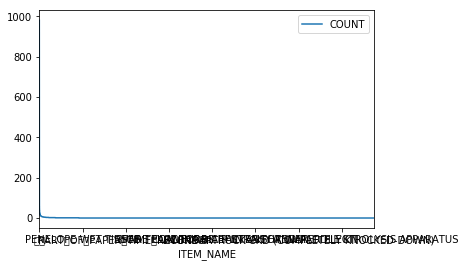

In [26]:
name_count.plot()

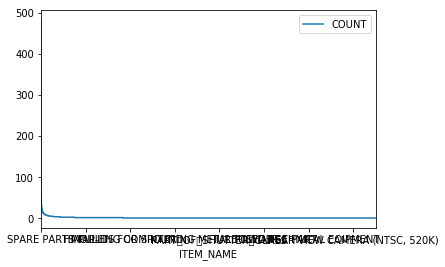

In [34]:
name_count[3:750000].plot()

In [33]:
len(name_count)

1549980

In [40]:
name_count.iloc[100000]

COUNT    2
Name: BUTEETRAPPECARBURANT, dtype: int64

In [41]:
hscode_df.loc[hscode_df.ITEM_NAME == 'BUTEETRAPPECARBURANT']

,HS_CODE,ITEM_NAME
467953,401699,BUTEETRAPPECARBURANT
1380583,731814,BUTEETRAPPECARBURANT


In [45]:
name_code_group = hscode_df.groupby(['ITEM_NAME', 'HS_CODE']).agg('count').reset_index()
name_code_group.head()

,ITEM_NAME,HS_CODE
0,""" "" DRIVER",820510
1,""", including combined ball/roller bearings""",848230
2,"""0"" GRADE GRANITE SURFACE PLATE",680293
3,"""1 Primary Wound Dressing"" 17mL",300590
4,"""5 TO 7""",852329


In [46]:
name_code_group[name_code_group.ITEM_NAME.duplicated(keep=False)]

,ITEM_NAME,HS_CODE
79,"""CKD"" PARTS FOR TOUCH PANEL",392340
80,"""CKD"" PARTS FOR TOUCH PANEL",847160
81,"""CKD"" PARTS FOR TOUCH PANEL",851770
91,"""CKD""SWEATER",610990
92,"""CKD""SWEATER",611011
93,"""CKD""SWEATER",611012
94,"""CKD""SWEATER",611019
105,"""CONSUMABLE TOOLS FOR PROCESSING STONE.""",680300
106,"""CONSUMABLE TOOLS FOR PROCESSING STONE.""",680423
107,"""CONSUMABLE TOOLS FOR PROCESSING STONE.""",846596


In [70]:
name_code_group[name_code_group.ITEM_NAME.duplicated(keep=False)].iloc[582422:-13].drop_duplicates('ITEM_NAME')

,ITEM_NAME,HS_CODE
1970305,간이정액환급금 징구,391990
1970320,간이정액환급금징구,560750
1970323,간이정액환급분,851770
1970326,간이환급,320649
1970357,간이환급금 징구,852692
1970360,간이환급분,382200
1970366,간이환급액,840999
1970377,간이환급액추징신고분,840999
1970380,간이환급추징,852580
1970386,개별환급,381800


In [47]:
name_code_group[~name_code_group.ITEM_NAME.duplicated(keep=False)]

,ITEM_NAME,HS_CODE
0,""" "" DRIVER",820510
1,""", including combined ball/roller bearings""",848230
2,"""0"" GRADE GRANITE SURFACE PLATE",680293
3,"""1 Primary Wound Dressing"" 17mL",300590
4,"""5 TO 7""",852329
5,"""5200199 SWISSCARE",330491
6,"""5200299 SWISSCARE",330530
7,"""5200399 SWISSCARE",330499
8,"""5300300 SWISSCARE",330300
9,"""95967700 SORCE OF MATERIAL INVENTORY OF SERVI...",940190


In [4]:
hscode_df.ITEM_NAME.str.upper().str.replace(r"[^A-Z ]", "", regex=True)

0                                        PAPER MACHINE PARTS
1                                   PARAFFIN DISSOLVER PARTS
2                                               PARA THIMMER
3          PARS FOR CONSTANT TEMPERATURE AND HUMIDITY CHA...
4                                                       PART
5                                          PARTAIR PREHEATER
6                                               PART CLEANER
7                                     PART CLEANER AND PARTS
8                                        PART COFFEE ROASTER
9                                                   PART FOR
10                   PART FOR  PPH MODULAR CCR REGEN SECTION
11                                      PART FOR AIR CLEANER
12                                  PART FOR AIR CONDITIONER
13                                   PART FOR AIRCONDITIONER
14                          PART FOR AIRCONDITIONING MACHINE
15                          PART FOR AIRCONDITIONING MACHINE
16                      

In [5]:
re_hscode_df = hscode_df
re_hscode_df.ITEM_NAME = re_hscode_df.ITEM_NAME.str.upper().str.replace(r"[^A-Z ]", "", regex=True)
re_hscode_df.head()

,HS_CODE,ITEM_NAME
0,841990,PAPER MACHINE PARTS
1,841990,PARAFFIN DISSOLVER PARTS
2,841990,PARA THIMMER
3,841990,PARS FOR CONSTANT TEMPERATURE AND HUMIDITY CHA...
4,841990,PART


In [6]:
re_hscode_df.dropna(inplace=True)
re_hscode_df.loc[re_hscode_df.ITEM_NAME.isna()]

,HS_CODE,ITEM_NAME


In [20]:
re_hscode_df.ITEM_NAME = re_hscode_df.ITEM_NAME.str.strip()

In [22]:
re_hscode_df.sort_values('ITEM_NAME').head()

,HS_CODE,ITEM_NAME
330770,382490,A
1437490,760611,A
1404645,741510,A
1767492,870790,A
178272,293190,A


In [17]:
re_hscode_df.drop(re_hscode_df[re_hscode_df.ITEM_NAME == '   '].index, inplace=True)
re_hscode_df.loc[re_hscode_df.ITEM_NAME == '']

,HS_CODE,ITEM_NAME


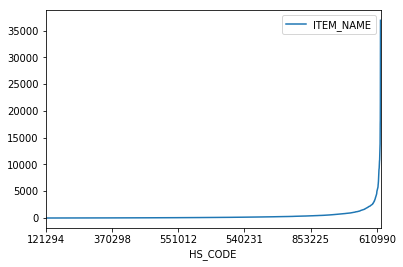

In [34]:
re_hscode_df.groupby('HS_CODE').agg('count').sort_values('ITEM_NAME').plot()

In [36]:
re_hscode_df.groupby('HS_CODE').agg('count').sort_values('ITEM_NAME', ascending=False).head()

,ITEM_NAME
HS_CODE,
392690,36911
847990,31588
870899,21655
848690,18204
330499,17582


In [40]:
re_hscode_df.groupby(['HS_CODE', 'ITEM_NAME']).agg('count').reset_index()

,HS_CODE,ITEM_NAME
0,010121,ALIVEDOMESTICHORSE
1,010121,ALIVEHORSE
2,010121,BREEDINGHORSES
3,010121,HORSE
4,010121,HORSEFORRACING
5,010121,HORSES
6,010121,HORSESFORFARMBREEDING
7,010121,HORSESFORFARMBREEDINGANAMLS
8,010121,HORSESFORRACING
9,010121,HORSESPUREBREDBREEDINGANIMALS


In [83]:
re_hscode_df_name_count = re_hscode_df.groupby('ITEM_NAME').agg('count')\
                        .rename(columns={'HS_CODE': 'COUNT'}).reset_index()\
                        .sort_values('COUNT', ascending=False)
re_hscode_df_name_count.head()

,ITEM_NAME,COUNT
0,,1552
1081021,SHIRTS,781
1244015,TSHIRTS,637
841313,PARTS,556
391145,FABRIC,547


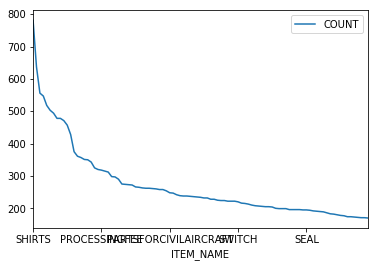

In [99]:
re_hscode_df_name_count[1:100].plot(x='ITEM_NAME', y="COUNT")

In [103]:
# need to fix
re_hscode_df.groupby(['HS_CODE', 'ITEM_NAME']).agg('count').reset_index()

,HS_CODE,ITEM_NAME
0,010121,
1,010121,ALIVEDOMESTICHORSE
2,010121,ALIVEHORSE
3,010121,BREEDINGHORSES
4,010121,HORSE
5,010121,HORSEFORRACING
6,010121,HORSES
7,010121,HORSESFORFARMBREEDING
8,010121,HORSESFORFARMBREEDINGANAMLS
9,010121,HORSESFORRACING


In [23]:
re_hscode_df.drop_duplicates(inplace=True)
re_hscode_df.head()

,HS_CODE,ITEM_NAME
0,841990,PAPER MACHINE PARTS
1,841990,PARAFFIN DISSOLVER PARTS
2,841990,PARA THIMMER
3,841990,PARS FOR CONSTANT TEMPERATURE AND HUMIDITY CHA...
4,841990,PART


In [52]:
# Check above
re_hscode_df.loc[re_hscode_df.ITEM_NAME == 'PART'].sort_values('HS_CODE').head()

,HS_CODE,ITEM_NAME
364732,391690,PART
365872,391729,PART
398775,392290,PART
411362,392321,PART
2067963,392690,PART


In [116]:
name_count[~name_count.index.str.upper().str.contains(r"[^A-Z ]")]

,COUNT
ITEM_NAME,
PARTS,539
FABRIC,508
SPARE PARTS,482
WOVEN FABRIC,465
WOVEN FABRICS,452
PLATE,419
TUBE,362
YARN,346
COVER,343


In [115]:
len(name_count)

1549980

In [154]:
test = hscode_df.ITEM_NAME.str.upper().str.contains(r"[^A-Z ]")

In [156]:
test.loc[(test != False) & (test != True)]

1620       NaN
2258       NaN
2259       NaN
2279       NaN
2280       NaN
2281       NaN
2434       NaN
2834       NaN
3060       NaN
3276       NaN
3380       NaN
3450       NaN
3463       NaN
3506       NaN
3624       NaN
4581       NaN
5069       NaN
5070       NaN
5071       NaN
5072       NaN
5073       NaN
5219       NaN
5260       NaN
5332       NaN
5412       NaN
6324       NaN
6492       NaN
6640       NaN
6666       NaN
6667       NaN
          ... 
1965572    NaN
1967902    NaN
1972592    NaN
1976298    NaN
1989090    NaN
1994383    NaN
1999755    NaN
2003409    NaN
2010451    NaN
2010482    NaN
2012393    NaN
2013610    NaN
2015156    NaN
2015311    NaN
2015410    NaN
2016076    NaN
2016267    NaN
2021916    NaN
2024014    NaN
2035543    NaN
2038732    NaN
2039085    NaN
2050194    NaN
2052345    NaN
2052733    NaN
2052800    NaN
2052933    NaN
2057280    NaN
2060328    NaN
2070445    NaN
Name: ITEM_NAME, Length: 3360, dtype: object

In [157]:
off_special_char = hscode_df[~test.fillna(True)]
off_special_char.head()

,HS_CODE,ITEM_NAME
0,8419909090,PAPER MACHINE PARTS
1,8419909090,PARAFFIN DISSOLVER PARTS
2,8419909090,PARA THIMMER
3,8419909090,PARS FOR CONSTANT TEMPERATURE AND HUMIDITY CHA...
4,8419909090,PART


In [158]:
off_special_char.HS_CODE = off_special_char.HS_CODE.str.slice(stop=6)
off_special_char.head()

/home/ktnet/Git/pandas-modules/venv/lib/python3.5/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,HS_CODE,ITEM_NAME
0,841990,PAPER MACHINE PARTS
1,841990,PARAFFIN DISSOLVER PARTS
2,841990,PARA THIMMER
3,841990,PARS FOR CONSTANT TEMPERATURE AND HUMIDITY CHA...
4,841990,PART


In [161]:
off_special_char.ITEM_NAME = off_special_char.ITEM_NAME.str.upper()

/home/ktnet/Git/pandas-modules/venv/lib/python3.5/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [162]:
off_special_char.sort_values('ITEM_NAME')

,HS_CODE,ITEM_NAME
330767,382490,A
52672,180632,A
1728648,903149,A
1895030,853650,A
1601584,851770,A
629324,830890,A
418851,392329,A
170068,292221,A ACID DYES POWDER
682101,841480,A AIR COMPRESSOR
1172618,620630,A AND F LOGO EMBROIDERED LONG SLEEVE TEE DOHEN...


### Make train, test set

In [26]:
from sklearn.model_selection import train_test_split

In [54]:
train, test = train_test_split(re_hscode_df, test_size=0.2)

1104312

In [164]:
train.ITEM_NAME.to_csv('train_name_fta_spcial_char_off.txt', index=False, header=False)

In [165]:
train.HS_CODE.to_csv('train_class_fta_spcial_char_off.txt', index=False, header=False)

In [166]:
test.ITEM_NAME.to_csv('test_name_fta_spcial_char_off.txt', index=False, header=False)

In [167]:
test.HS_CODE.to_csv('test_class_fta_spcial_char_off.txt', index=False, header=False)

In [152]:
train.sort_values('ITEM_NAME')

,HS_CODE,ITEM_NAME
418851,392329,A
330767,382490,A
1895030,853650,A
629324,830890,A
1728648,903149,A
682101,841480,A AIR COMPRESSOR
784791,843143,A AUTO SPARE PARTS
1759075,854370,A AXIAL ACCELERATION SENSOR
825526,845490,A AXIS
821979,846692,A AXIS SUPPORT


In [27]:
train, test = train_test_split(re_hscode_df, test_size=0.2)

In [171]:
train.ITEM_NAME.to_csv('train_name_fta.txt', index=False, header=False)
train.HS_CODE.to_csv('train_class_fta.txt', index=False, header=False)
test.ITEM_NAME.to_csv('test_name_fta.txt', index=False, header=False)
test.HS_CODE.to_csv('test_class_fta.txt', index=False, header=False)

In [28]:
train.ITEM_NAME.to_csv('train_name_fta_alpha_word.txt', index=False, header=False)
train.HS_CODE.to_csv('train_class_fta_alpha_word.txt', index=False, header=False)
test.ITEM_NAME.to_csv('test_name_fta_alpha_word.txt', index=False, header=False)
test.HS_CODE.to_csv('test_class_fta_alpha_word.txt', index=False, header=False)